In [1]:
import torch
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from time import time

import numpy as np
import pandas as pd

In [2]:

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


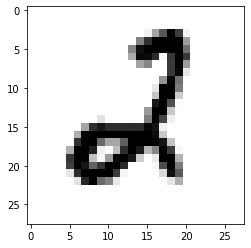

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

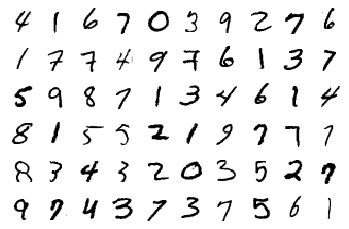

In [4]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [5]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        
        return output

In [6]:
input_size = 784  # MNIST pixel size is 28x28 = 784
hidden_size = 500
output_size = 10  # classifying digits from 0-9, so 10 possible outputs
num_epochs = 5

learning_rate = 0.001

model = NeuralNet(input_size, hidden_size, output_size)

lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:

for epoch in range(num_epochs):
    running_loss = 0
    for i, (images,labels) in enumerate(trainloader):
        # Flatten MNIST images into a 784 long vector
        images = images.reshape(-1,28*28)
        
        # Training pass
        optimizer.zero_grad()
        
        out = model(images)
        loss = lossFunction(out,labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    print('Epoch: %d | loss: %.3f' % (epoch + 1, running_loss / 5000))
        

Epoch: 1 | loss: 0.059
Epoch: 2 | loss: 0.027
Epoch: 3 | loss: 0.020
Epoch: 4 | loss: 0.016
Epoch: 5 | loss: 0.014


In [8]:

correct = 0
total = 0

with torch.no_grad():
    for images,labels in testloader:
        images = images.reshape(-1,28*28)
        
        out = model(images) # the predictions
        _,predicted = torch.max(out.data,1)
        
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.62 %
